<a href="https://colab.research.google.com/github/Adrian-create-gif/Project/blob/main/Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, kruskal
import matplotlib.pyplot as plt
import seaborn as sns
#Load data set
df = pd.read_csv('flight.csv')

Trend Test for Crashes per Year
Slope: -42.2000, p-value: 0.0428


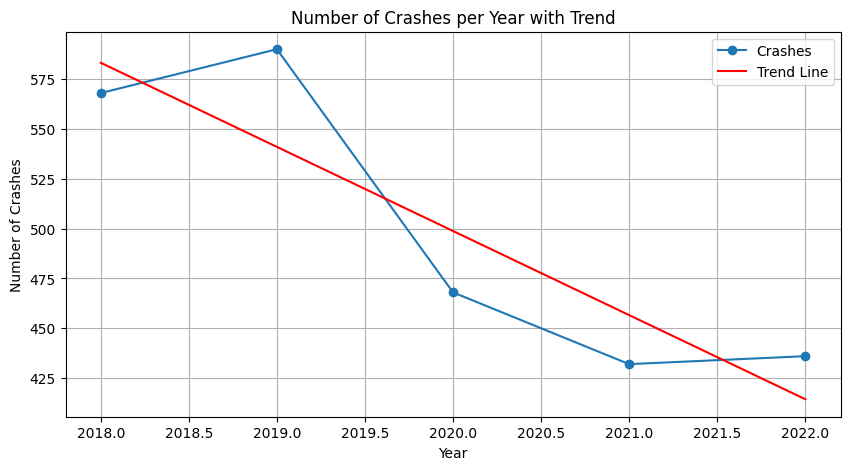

In [ ]:
from scipy.stats import linregress

# Convert 'acc.date' to datetime and extract the year
df['acc.date'] = pd.to_datetime(df['acc.date'], errors='coerce')
df['year'] = df['acc.date'].dt.year

# Group by year and drop any rows with NaT (Not a Time) in the date column
crashes_per_year = df.groupby('year').size().dropna()

# Regression test
slope, intercept, r_value, p_value, std_err = linregress(crashes_per_year.index, crashes_per_year.values)

print("Trend Test for Crashes per Year")
print(f"Slope: {slope:.4f}, p-value: {p_value:.4f}")

# Visualization
plt.figure(figsize=(10,5))
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o', label="Crashes")
plt.plot(crashes_per_year.index, intercept + slope*crashes_per_year.index, color='red', label="Trend Line")
plt.title("Number of Crashes per Year with Trend")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.legend()
plt.grid(True)
plt.show()

Kruskal-Wallis Test - Top 20 Aircraft Types vs Fatalities
Statistic: 103.0085, p-value: 0.0000


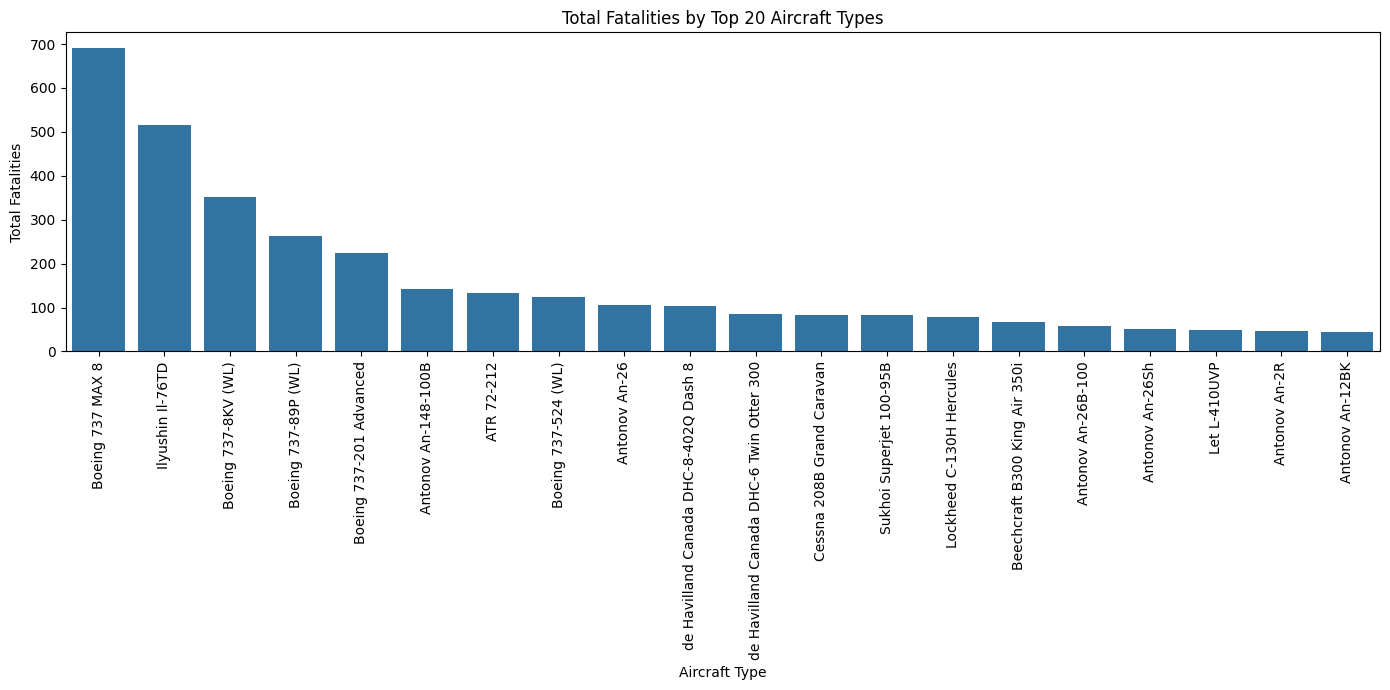

In [ ]:

# Convert 'fat' to numeric, coercing errors
df['fat'] = pd.to_numeric(df['fat'], errors='coerce')

# Prepare data - drop rows where 'fat' is NaN after conversion
df_filtered = df.dropna(subset=['fat'])

# Get the top 20 aircraft types by total fatalities
top_aircraft_types = df_filtered.groupby('type')['fat'].sum().nlargest(20)
top_aircraft_types_list = top_aircraft_types.index.tolist()

# Filter the dataframe to include only the top 20 aircraft types
df_top_aircraft = df_filtered[df_filtered['type'].isin(top_aircraft_types_list)]

# Kruskal-Wallis test (optional, as the focus is on visualization)
# Prepare groups for Kruskal-Wallis test
aircraft_groups = [df_top_aircraft[df_top_aircraft['type'] == aircraft]['fat'].values for aircraft in top_aircraft_types_list if df_top_aircraft[df_top_aircraft['type'] == aircraft]['fat'].sum() > 0]

if len(aircraft_groups) > 1:
    kruskal_stat, kruskal_p = kruskal(*aircraft_groups)
    print("Kruskal-Wallis Test - Top 20 Aircraft Types vs Fatalities")
    print(f"Statistic: {kruskal_stat:.4f}, p-value: {kruskal_p:.4f}")
else:
    print("Not enough groups to perform Kruskal-Wallis test on top 20 aircraft types with fatalities.")


# Visualization
plt.figure(figsize=(14, 7)) # Increased figure size for better readability
sns.barplot(x=top_aircraft_types.index, y=top_aircraft_types.values) # Changed to barplot
plt.title("Total Fatalities by Top 20 Aircraft Types") # Updated title
plt.xlabel("Aircraft Type")
plt.ylabel("Total Fatalities") # Updated label
plt.xticks(rotation=90) # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Kruskal-Wallis Test - Top 10 Regions vs Fatalities
Statistic: 19.0000, p-value: 0.0252


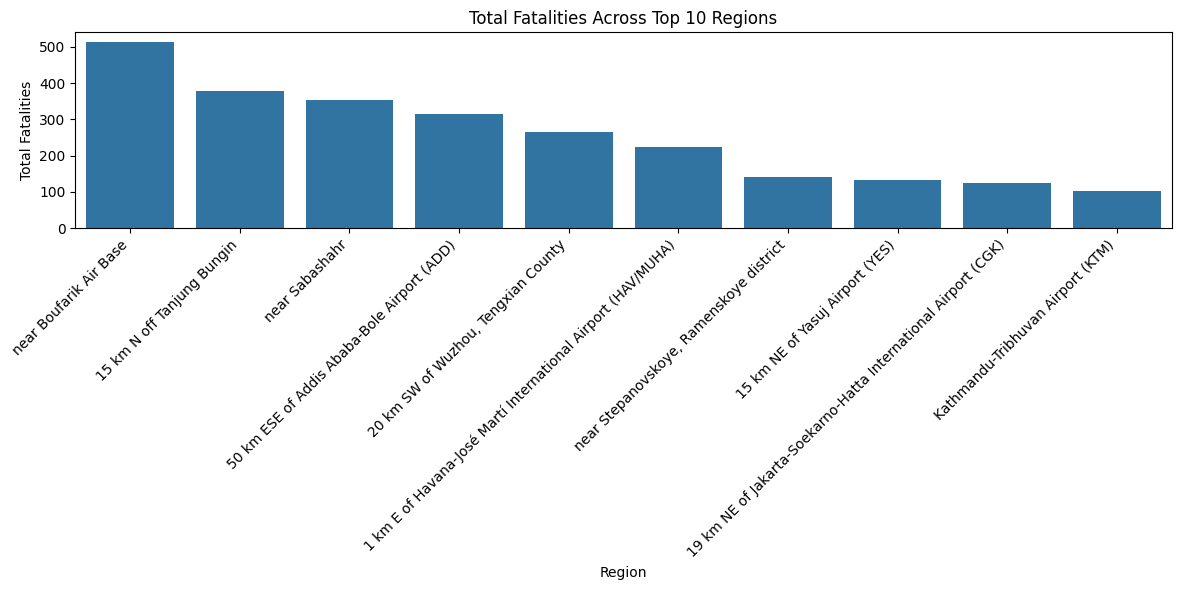

In [ ]:
from scipy.stats import f_oneway, kruskal

# Convert 'fat' to numeric, coercing errors
df['fat'] = pd.to_numeric(df['fat'], errors='coerce')

# Prepare region data - drop rows where 'fat' is NaN after conversion
df_filtered = df.dropna(subset=['fat'])

# Get the top 10 regions by total fatalities
top_regions = df_filtered.groupby('location')['fat'].sum().nlargest(10)

# Kruskal-Wallis test (optional, as the focus is on visualization)
# Prepare groups for Kruskal-Wallis test
region_groups = [df_filtered[df_filtered['location'] == region]['fat'].values for region in top_regions.index if df_filtered[df_filtered['location'] == region]['fat'].sum() > 0]

if len(region_groups) > 1:
    kruskal_stat, kruskal_p = kruskal(*region_groups)
    print("Kruskal-Wallis Test - Top 10 Regions vs Fatalities")
    print(f"Statistic: {kruskal_stat:.4f}, p-value: {kruskal_p:.4f}")
else:
    print("Not enough groups to perform Kruskal-Wallis test on top 10 regions.")


# Visualization
plt.figure(figsize=(12,6)) # Increased figure size for better readability
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.title("Total Fatalities Across Top 10 Regions")
plt.xlabel("Region")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=45, ha='right') # Rotate labels and align to the right for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()